In [63]:
import pandas as pd
import numpy as np

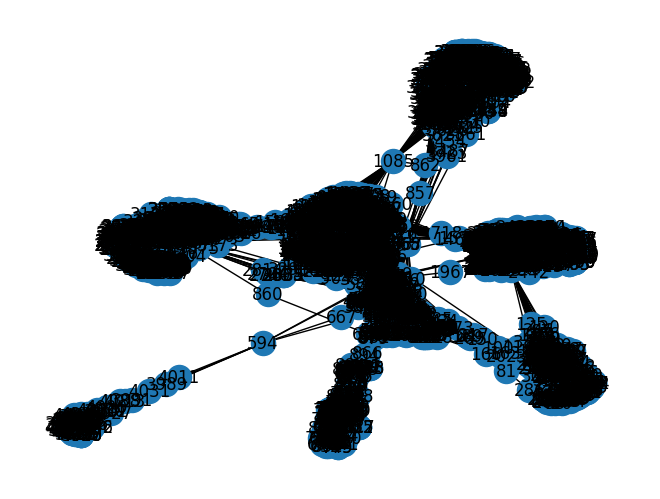

In [64]:
# Graph Representation using NetworkX

!pip install networkx
import networkx as nx

G = nx.Graph()

filename = "/content/facebook_combined.txt"
edgelist = []
with open(filename,'r') as file:
    for line in file:
        if line.lstrip().startswith('%'):
            continue
        no_whitespaces = line.strip()
        splitted = no_whitespaces.split()
        if len(splitted) == 3:
          continue
        mapped = map(int, splitted)
        one_data = list(mapped)
        edgelist.append((one_data[0],one_data[1]))

G.add_edges_from(edgelist)

import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)

plt.show()

In [65]:
m = len(edgelist)

import random

non = list(nx.non_edges(G))

non_edges = random.sample(non, 3*m)

In [66]:
import itertools

node_degrees = dict(G.degree())

degree_centrality = nx.degree_centrality(G)

clustering_coefficient = nx.clustering(G)

In [67]:
def local_eigenvector_centrality(G, nodes=None):
    if nodes is None:
        nodes = G.nodes()
    local_eigenvector = {}
    for node in nodes:
        neighbors = list(G.neighbors(node))
        subgraph = G.subgraph(neighbors + [node])
        local_eigenvector[node] = nx.eigenvector_centrality(subgraph)[node]
    return local_eigenvector

local_eigenvector = local_eigenvector_centrality(G)

In [68]:
node_degrees = {key: node_degrees[key] for key in sorted(node_degrees.keys())}
degree_centrality = {key: degree_centrality[key] for key in sorted(degree_centrality.keys())}
clustering_coefficient = {key: clustering_coefficient[key] for key in sorted(clustering_coefficient.keys())}
eigenvector_centrality = {key: local_eigenvector[key] for key in sorted(local_eigenvector.keys())}

df = pd.DataFrame(list(node_degrees.items()), columns=['node', 'node_degree'])
df['degree_centrality'] = df['node'].map(degree_centrality)
df['clustering_coefficient'] = df['node'].map(clustering_coefficient)
df['local_eigenvector_centrality'] = df['node'].map(eigenvector_centrality)

df

,node,node_degree,degree_centrality,clustering_coefficient,local_eigenvector_centrality
0,0,347,0.085934,0.041962,0.289796
1,1,17,0.004210,0.419118,0.392721
2,2,10,0.002476,0.888889,0.322646
3,3,17,0.004210,0.632353,0.294592
4,4,10,0.002476,0.866667,0.321293
...,...,...,...,...,...
4034,4034,2,0.000495,1.000000,0.577350
4035,4035,1,0.000248,0.000000,0.707107
4036,4036,2,0.000495,1.000000,0.577350
4037,4037,4,0.000991,0.666667,0.510036


In [69]:
# Edges

jaccard_coefficient = nx.jaccard_coefficient(G, edgelist)

adamic_adar_index = nx.adamic_adar_index(G, edgelist)

preferential_attachment = nx.preferential_attachment(G, edgelist)

jaccard_coefficient = list(jaccard_coefficient)

adamic_adar_index = list(adamic_adar_index)

preferential_attachment = list(preferential_attachment)

jaccard_coefficient_dict = {(u,v): values for u,v,values in jaccard_coefficient}

adamic_adar_index_dict = {(u,v): values for u,v,values in adamic_adar_index}

preferential_attachment_dict = {(u,v): values for u,v,values in preferential_attachment}

keys1, keys2, values = zip(*[(k[0], k[1], v) for k, v in jaccard_coefficient_dict.items()])
df_jaccard = pd.DataFrame({'node_1': keys1, 'node_2': keys2, 'jaccard_coefficient': values})

keys1, keys2, values = zip(*[(k[0], k[1], v) for k, v in adamic_adar_index_dict.items()])
df_adamic = pd.DataFrame({'node_1_1': keys1, 'node_2_1': keys2, 'adamic_adar': values})

keys1, keys2, values = zip(*[(k[0], k[1], v) for k, v in preferential_attachment_dict.items()])
df_preferential = pd.DataFrame({'node_1_2': keys1, 'node_2_2': keys2, 'preferential_attachment_dict': values})

df_tuples = pd.concat([df_jaccard, df_adamic, df_preferential], axis=1)
df_tuples = df_tuples.drop(columns=['node_1_1', 'node_2_1', 'node_1_2', 'node_2_2'])
df_tuples = df_tuples.sort_values(by = ['node_1', 'node_2'])
df_tuples['link'] = 1

df_tuples

,node_1,node_2,jaccard_coefficient,adamic_adar,preferential_attachment_dict,link
0,0,1,0.045977,5.296263,5899,1
1,0,2,0.025862,3.281956,3470,1
2,0,3,0.045977,5.368408,5899,1
3,0,4,0.025862,4.220642,3470,1
4,0,5,0.034483,5.222650,4511,1
...,...,...,...,...,...,...
88229,4026,4030,0.333333,2.887459,171,1
88230,4027,4031,0.285714,1.695162,77,1
88231,4027,4032,0.125000,0.245246,14,1
88232,4027,4038,0.230769,1.143177,63,1


In [70]:
# Non-Edges

jaccard_coefficient = nx.jaccard_coefficient(G, list(non_edges))

adamic_adar_index = nx.adamic_adar_index(G, list(non_edges))

preferential_attachment = nx.preferential_attachment(G, list(non_edges))

jaccard_coefficient = list(jaccard_coefficient)

adamic_adar_index = list(adamic_adar_index)

preferential_attachment = list(preferential_attachment)

jaccard_coefficient_dict = {(u,v): values for u,v,values in jaccard_coefficient}

adamic_adar_index_dict = {(u,v): values for u,v,values in adamic_adar_index}

preferential_attachment_dict = {(u,v): values for u,v,values in preferential_attachment}

keys1, keys2, values = zip(*[(k[0], k[1], v) for k, v in jaccard_coefficient_dict.items()])
df_jaccard = pd.DataFrame({'node_1': keys1, 'node_2': keys2, 'jaccard_coefficient': values})

keys1, keys2, values = zip(*[(k[0], k[1], v) for k, v in adamic_adar_index_dict.items()])
df_adamic = pd.DataFrame({'node_1_1': keys1, 'node_2_1': keys2, 'adamic_adar': values})

keys1, keys2, values = zip(*[(k[0], k[1], v) for k, v in preferential_attachment_dict.items()])
df_preferential = pd.DataFrame({'node_1_2': keys1, 'node_2_2': keys2, 'preferential_attachment_dict': values})

df_non_tuples = pd.concat([df_jaccard, df_adamic, df_preferential], axis=1)
df_non_tuples = df_non_tuples.drop(columns=['node_1_1', 'node_2_1', 'node_1_2', 'node_2_2'])
df_non_tuples = df_non_tuples.sort_values(by = ['node_1', 'node_2'])
df_non_tuples['link'] = 0

df_both = pd.concat([df_tuples, df_non_tuples], axis=0).reset_index(drop=True)
df_b = df_both

In [71]:
df_b = df_both

In [72]:
df1 = pd.merge(df_both, df, left_on='node_1', right_on='node', how='inner')

# Drop the extra 'node' column from the merged DataFrame if you want to
df1.drop(columns=['node'], inplace=True)

pd.DataFrame(df1)

df_both = pd.merge(df1, df, left_on='node_2', right_on='node', how='inner')
df_both.drop(columns=['node'], inplace=True)


In [73]:
#link prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
y = df_both['link']
df_both.drop(columns=['link'], inplace=True)
z = df_both.drop(columns = ['node_1', 'node_2'])
x = z
x = ss.fit_transform(x)
x = pd.concat([df_both['node_1'], df_both['node_2'], pd.DataFrame(x, columns = z.columns)], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state = 347886166, stratify = y)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9717374057913526


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98     52941
     class 1       0.96      0.92      0.94     17647

    accuracy                           0.97     70588
   macro avg       0.97      0.96      0.96     70588
weighted avg       0.97      0.97      0.97     70588



In [75]:
from community import community_louvain

communities = community_louvain.best_partition(G)

comm = {key: communities[key] for key in sorted(communities.keys())}

df['Community'] = df['node'].map(comm)

In [76]:
df2 = pd.merge(df_b, df, left_on='node_1', right_on='node', how='inner')

# Drop the extra 'node' column from the merged DataFrame if you want to
df2.drop(columns=['node'], inplace=True)

pd.DataFrame(df2)

df_b = pd.merge(df2, df, left_on='node_2', right_on='node', how='inner')
df_b.drop(columns=['node'], inplace=True)
df_b


,node_1,node_2,jaccard_coefficient,adamic_adar,preferential_attachment_dict,link,node_degree_x,degree_centrality_x,clustering_coefficient_x,local_eigenvector_centrality_x,Community_x,node_degree_y,degree_centrality_y,clustering_coefficient_y,local_eigenvector_centrality_y,Community_y
0,0,1,0.045977,5.296263,5899,1,347,0.085934,0.041962,0.289796,0,17,0.004210,0.419118,0.392721,0
1,0,2,0.025862,3.281956,3470,1,347,0.085934,0.041962,0.289796,0,10,0.002476,0.888889,0.322646,0
2,0,3,0.045977,5.368408,5899,1,347,0.085934,0.041962,0.289796,0,17,0.004210,0.632353,0.294592,0
3,1,3,0.062500,0.436832,289,0,17,0.004210,0.419118,0.392721,0,17,0.004210,0.632353,0.294592,0
4,0,4,0.025862,4.220642,3470,1,347,0.085934,0.041962,0.289796,0,10,0.002476,0.866667,0.321293,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352931,663,2751,0.000000,0.000000,315,0,9,0.002229,0.722222,0.379385,1,35,0.008668,0.321008,0.329777,4
352932,889,2751,0.000000,0.000000,455,0,13,0.003219,0.705128,0.317892,13,35,0.008668,0.321008,0.329777,4
352933,1713,2751,0.000000,0.000000,140,0,4,0.000991,0.500000,0.547722,5,35,0.008668,0.321008,0.329777,4
352934,1855,2751,0.000000,0.000000,210,0,6,0.001486,0.533333,0.489634,5,35,0.008668,0.321008,0.329777,4


In [77]:
if 'Community_x' in df_b.columns and 'Community_y' in df_b.columns:
    # Add new column with condition
    df_same_com = (df_b['Community_x'] == df_b['Community_y']).astype(int)


In [78]:
df_b.drop(columns=['Community_x'], inplace=True)
df_b.drop(columns=['Community_y'], inplace=True)

In [79]:
x = df_b.drop(columns = ['node_1', 'node_2'])
y = df_same_com

In [80]:
# community detection
scaler = StandardScaler()
x = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state = 347886166, stratify = y)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 347886166)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     49090
           1       0.97      0.95      0.96     21498

    accuracy                           0.98     70588
   macro avg       0.97      0.97      0.97     70588
weighted avg       0.98      0.98      0.98     70588



In [82]:
# clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 7,random_state=347886166)
kmeans.fit(df)

# Assign each node to a cluster
cluster_labels = kmeans.labels_

cluster_list = []
for node, label in zip(G.nodes(), cluster_labels):
    cluster_list.append((node, label))

cluster_list = pd.DataFrame(cluster_list,columns=['node', 'cluster'])


In [83]:
cluster_list

,node,cluster
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
4034,4034,0
4035,4035,0
4036,4036,0
4037,4037,0


In [84]:
from sklearn.metrics import silhouette_score

# Assuming 'df' contains your feature data, 'G' is your graph, and 'cluster_labels' contains the cluster labels

# Calculate the silhouette score
silhouette_avg = silhouette_score(df, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5261367999123442


In [85]:
df_bot = pd.merge(df_both,cluster_list, left_on='node_1', right_on='node', how='inner')

# Drop the extra 'node' column from the merged DataFrame if you want to
df_bot.drop(columns=['node'], inplace=True)

pd.DataFrame(df2)

df_both = pd.merge(df_bot,cluster_list, left_on='node_2', right_on='node', how='inner')
df_both.drop(columns=['node'], inplace=True)
df_both

,node_1,node_2,jaccard_coefficient,adamic_adar,preferential_attachment_dict,node_degree_x,degree_centrality_x,clustering_coefficient_x,local_eigenvector_centrality_x,node_degree_y,degree_centrality_y,clustering_coefficient_y,local_eigenvector_centrality_y,cluster_x,cluster_y
0,0,1,0.045977,5.296263,5899,347,0.085934,0.041962,0.289796,17,0.004210,0.419118,0.392721,2,2
1,0,2,0.025862,3.281956,3470,347,0.085934,0.041962,0.289796,10,0.002476,0.888889,0.322646,2,2
2,0,3,0.045977,5.368408,5899,347,0.085934,0.041962,0.289796,17,0.004210,0.632353,0.294592,2,2
3,1,3,0.062500,0.436832,289,17,0.004210,0.419118,0.392721,17,0.004210,0.632353,0.294592,2,2
4,0,4,0.025862,4.220642,3470,347,0.085934,0.041962,0.289796,10,0.002476,0.866667,0.321293,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352931,3600,3825,0.096774,0.932536,189,7,0.001734,0.380952,0.501876,27,0.006686,0.287749,0.382840,0,0
352932,3614,3825,0.193548,1.906239,270,10,0.002476,0.577778,0.394005,27,0.006686,0.287749,0.382840,0,0
352933,3681,3825,0.027778,0.158618,270,10,0.002476,0.777778,0.343840,27,0.006686,0.287749,0.382840,0,0
352934,3652,3825,0.172414,2.393693,189,7,0.001734,0.619048,0.425298,27,0.006686,0.287749,0.382840,0,0


In [86]:
#influence prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
influence_labels = {node: betweenness_centrality[node] for node in G.nodes()}



X = df.drop(columns = ['Community'])
y = np.array([influence_labels[node] for node in G.nodes()])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0001101961704443981
